# Linear Regression Deep Learning 

In [30]:
import pandas as pd
import numpy as np
import logging

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# constants
PROCESSED_DATA_DIR = '../data/processed/'
matched_trees_file_name = 'all_matched_trees.csv'
mtrees_columns =['stem_diameter', 'area', 'aerial_data_height', 'agb']


In [14]:
## Load matched trees dataset

matched_trees = pd.read_csv(PROCESSED_DATA_DIR+matched_trees_file_name, usecols=mtrees_columns)

In [15]:
matched_trees.head()

,stem_diameter,agb,aerial_data_height,area
0,77,5155.349511,36.342200,87.15
1,53,2000.505634,26.399200,35.91
2,80,5494.137782,31.547300,132.25
3,41,1074.258285,27.194000,79.05
4,81,5522.221358,25.783001,41.58


In [16]:
matched_trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stem_diameter       3494 non-null   int64  
 1   agb                 3494 non-null   float64
 2   aerial_data_height  3494 non-null   float64
 3   area                3494 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 109.3 KB


In [17]:
matched_trees.isnull().sum()

stem_diameter         0
agb                   0
aerial_data_height    0
area                  0
dtype: int64

In [18]:
matched_trees.describe()

,stem_diameter,agb,aerial_data_height,area
count,3494.000000,3494.000000,3494.000000,3494.000000
mean,43.842301,1890.015405,32.057030,37.355753
std,20.428421,1738.371807,6.167840,32.900932
min,15.000000,83.766125,3.214800,2.420000
25%,25.000000,404.691382,28.930000,12.960000
50%,40.000000,1154.694451,32.650051,25.200000
75%,62.000000,3142.576667,36.425299,53.042500
max,87.000000,5998.267297,44.349600,184.950000


<Figure size 576x288 with 0 Axes>

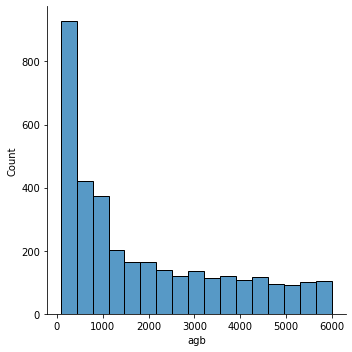

In [33]:
plt.figure(figsize=(8,4))
sns.displot(matched_trees['agb'])

<AxesSubplot:xlabel='agb', ylabel='area'>

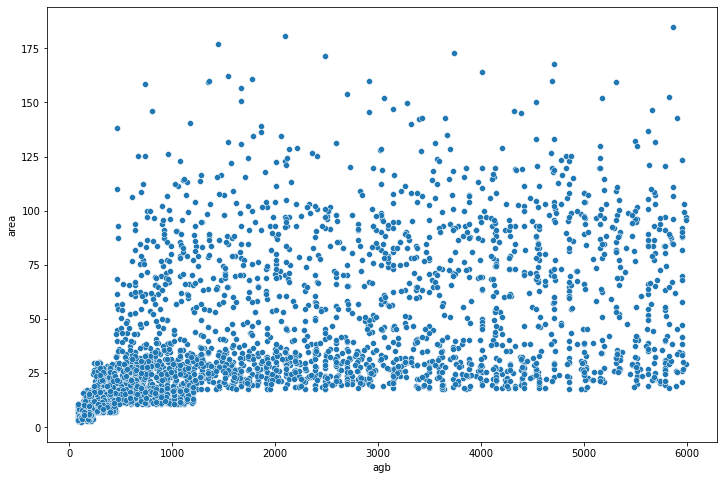

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='agb',y='area',data=matched_trees)

<AxesSubplot:xlabel='agb', ylabel='aerial_data_height'>

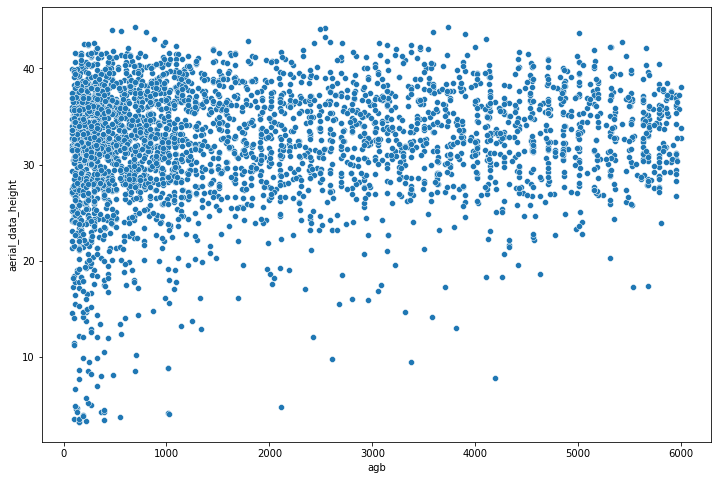

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='agb',y='aerial_data_height',data=matched_trees)

<AxesSubplot:xlabel='agb', ylabel='stem_diameter'>

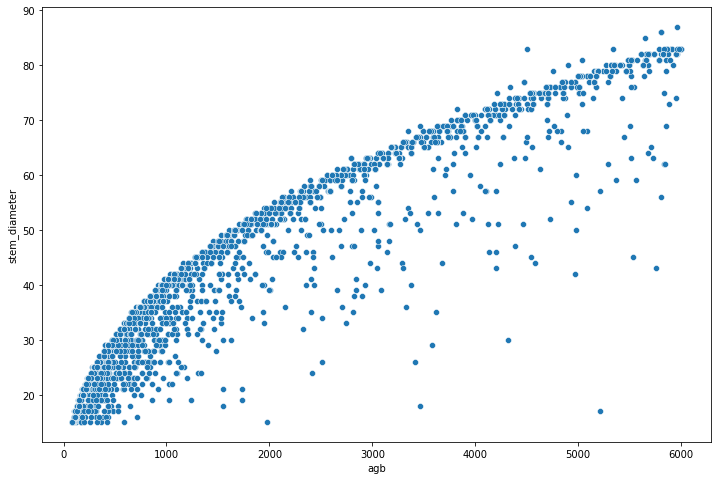

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='agb',y='stem_diameter',data=matched_trees)

In [42]:
matched_trees.corr()

,stem_diameter,agb,aerial_data_height,area
stem_diameter,1.000000,0.951080,0.156807,0.567607
agb,0.951080,1.000000,0.133020,0.542476
aerial_data_height,0.156807,0.133020,1.000000,0.315510
area,0.567607,0.542476,0.315510,1.000000


<AxesSubplot:>

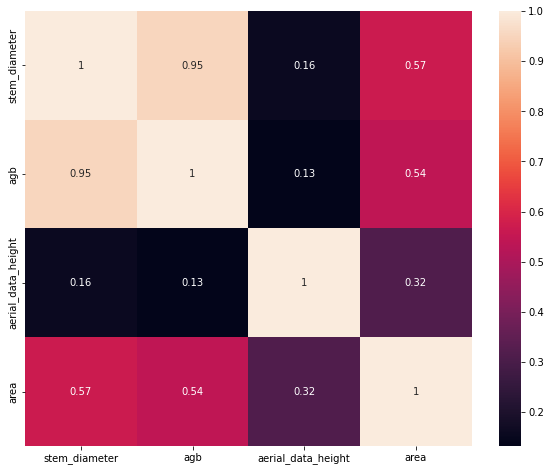

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(matched_trees.corr(), annot=True)

## Scaling and Train Test Split

In [ ]:
X = matched_trees.drop('agb',axis=1)
y = matched_trees['agb']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)